In [2]:
import matplotlib.pyplot as plt

import skimage.io
from skimage.filters import threshold_mean

imname = 'Slice_4_40X_Top_of_Brain.tif'
img = skimage.io.imread(imname)

nucl = img[:, :, 0]

thresh = threshold_mean(nucl)
binary = nucl > thresh

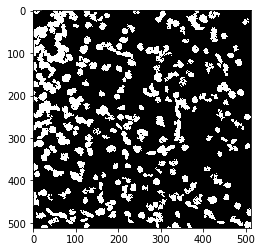

In [3]:
from skimage.morphology import remove_small_objects

clim = remove_small_objects(binary, min_size=100)
plt.imshow(clim, cmap='gray')
plt.show()

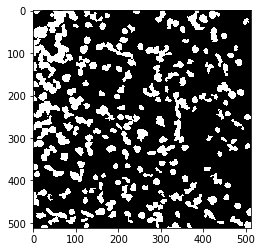

In [5]:
from skimage.filters.rank import median
from skimage.morphology import disk
from scipy import ndimage as ndi

fill_cells = median(ndi.binary_fill_holes(clim), disk(2))
plt.imshow(fill_cells, cmap='gray')
plt.show()

C:\Users\Emily\Anaconda3\lib\site-packages\skimage\util\arraycrop.py:175: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = np.array(ar[slices], order=order, copy=True)


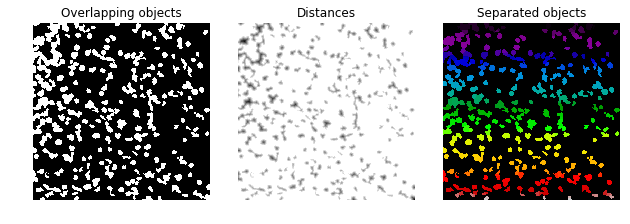

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.morphology import watershed
from skimage.feature import peak_local_max

# Generate the markers as local maxima of the distance to the background
distance = ndi.distance_transform_edt(fill_cells)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((5,5)),
                            labels=fill_cells)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=fill_cells)

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(fill_cells, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray, interpolation='nearest')
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

In [7]:
labels.max()

507